In [0]:
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 145113 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.17-0ubuntu2~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.17-0ubuntu2~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.17-0ubuntu2~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [0]:
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir gdrive

In [0]:
!google-drive-ocamlfuse gdrive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [0]:
!ls gdrive/capstone

histopathologic-cancer-detection.zip  Untitled0.ipynb


In [0]:
!unzip -q 'gdrive/capstone/histopathologic-cancer-detection.zip'

In [0]:
!unzip test.zip -d test_new

Streaming output truncated to the last 5000 lines.
  inflating: test_new/f38fdc50920ec3e941db1ceb8d9fbf7689141f7b.tif  
  inflating: test_new/5afe1edc4601292b9d9332fe50761e47e7dd294b.tif  
  inflating: test_new/9c08e36badca1b23733c6283f4784aa20c3fa9e8.tif  
  inflating: test_new/c3647da08ce54b349ea8ebb69e4792376f766284.tif  
  inflating: test_new/0db50b898bb3ae0f4f3b61eed515530e53da829a.tif  
  inflating: test_new/ae9c944724ca80ffe5dca54a761b96f4e4f5e0c1.tif  
  inflating: test_new/09f444aecb1b14b9f9f0668038556f59fa9b55ff.tif  
  inflating: test_new/a1a0cc24afc5e4c4a57c27ce6e7e470e3a290b72.tif  
  inflating: test_new/2d80d69e080ba4bc523dda7244ca304ed706f8b5.tif  
  inflating: test_new/762ddeddd730677336469d29cb154d692c2300ea.tif  
  inflating: test_new/f355f78a751a2f25f77a06a08886ad1a2380352e.tif  
  inflating: test_new/d0587229ab7a4ded62f7b8875b90836444682a5e.tif  
  inflating: test_new/80bec544bbb185c0c9e29e6be2dc000621da4b72.tif  
  inflating: test_new/15074a9505f275e920be9d64aeb42e

In [0]:
!unzip train.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/e2d32158455c69c0c9ac857e035c9e128b34726b.tif  
  inflating: train/446352679530d3617d04b1cdef7dccc0208574fe.tif  
  inflating: train/178249ee2375177606d188bb8b8f0b539f702f80.tif  
  inflating: train/b2db63f200a524a289dea703e6d023ef8fc2ea49.tif  
  inflating: train/c4a010ae4a8b1aa6bab3144c55c60b372ed43a0c.tif  
  inflating: train/030700a7d78f367c9cfb849ca16a31ec7163c64e.tif  
  inflating: train/cbdfa884e68bf199193dab23a4016c3f0241a7e8.tif  
  inflating: train/eac0dd0a81a6b3c33f3fd2b05c37ce231a950732.tif  
  inflating: train/8adeaaa0e11a777ca9c3f46735b3281a827ac96a.tif  
  inflating: train/c4977a74753be9e714f6a4998295bcdc9146594e.tif  
  inflating: train/7dbb732e91e482ff3b99311fad36b85b8113840b.tif  
  inflating: train/89d082e53ee948a3cd0b63678cf8f1197e6caf10.tif  
  inflating: train/cb90133b3d00077640794eeedbb1f228f83c79e8.tif  
  inflating: train/11004b5505425086b3fb03c4d4dd3b95e46201aa.tif  
  inflating: train/a0466c

In [0]:
from numpy.random import seed
seed(101)
from tensorflow import set_random_seed
set_random_seed(101)

import pandas as pd
import numpy as np


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

import os
import cv2

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
IMAGE_SIZE = 96
IMAGE_CHANNELS = 3

SAMPLE_SIZE = 80000 # the number of images we use from each of the two classes


In [0]:
print(len(os.listdir('train')))

220025


In [0]:
df_data = pd.read_csv('train_labels.csv')

# removing this image because it caused a training error previously
df_data = df_data[df_data['id'] != 'dd6dfed324f9fcb6f93f46f32fc800f2ec196be2']

# removing this image because it's black
df_data = df_data[df_data['id'] != '9369c7278ec8bcc6c880d99194de09fc2bd4efbe']


print(df_data.shape)

(220023, 2)


In [0]:
df_data['label'].value_counts()

0    130907
1     89116
Name: label, dtype: int64

In [0]:
def draw_category_images(col_name,figure_cols, df, IMAGE_PATH):
    
    """
    Give a column in a dataframe,
    this function takes a sample of each class and displays that
    sample on one row. The sample size is the same as figure_cols which
    is the number of columns in the figure.
    Because this function takes a random sample, each time the function is run it
    displays different images.
    """
    

    categories = (df.groupby([col_name])[col_name].nunique()).index
    f, ax = plt.subplots(nrows=len(categories),ncols=figure_cols, 
                         figsize=(4*figure_cols,4*len(categories))) # adjust size here
    # draw a number of images for each location
    for i, cat in enumerate(categories):
        sample = df[df[col_name]==cat].sample(figure_cols) # figure_cols is also the sample size
        for j in range(0,figure_cols):
            file=IMAGE_PATH + sample.iloc[j]['id'] + '.tif'
            im=cv2.imread(file)
            ax[i, j].imshow(im, resample=True, cmap='gray')
            ax[i, j].set_title(cat, fontsize=16)  
    plt.tight_layout()
    plt.show()

TypeError: ignored

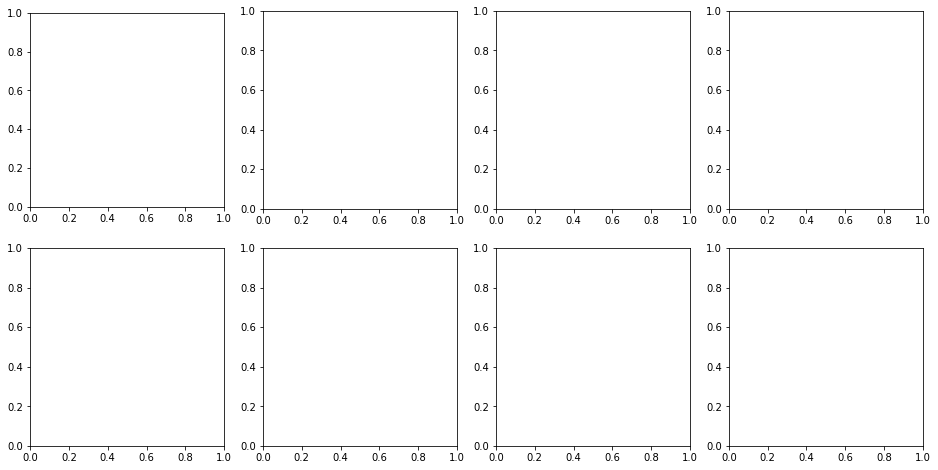

In [0]:
IMAGE_PATH = '/content/train' 

draw_category_images('label',4, df_data, IMAGE_PATH)

In [0]:
df_data.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [0]:
df_0 = df_data[df_data['label'] == 0].sample(SAMPLE_SIZE, random_state = 101)
# filter out class 1
df_1 = df_data[df_data['label'] == 1].sample(SAMPLE_SIZE, random_state = 101)

# concat the dataframes
df_data = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)
# shuffle
df_data = shuffle(df_data)

df_data['label'].value_counts()

1    80000
0    80000
Name: label, dtype: int64

In [0]:
df_data.head()

,id,label
149725,66bb11eecb0bab430f717313508cad7a43afdfc1,1
106036,ca7d4fbde7afaa4c18c8eedb2c6de73c9daf92c9,1
148987,6a5417bfa815636d4aa34dd7d450018a5da4299a,1
7923,eed6b634093d72445abf45871a500c8dc3ec0162,0
154464,049f37d99df36245dbac74aad8c50840d8e42d74,1


In [0]:
# train_test_split

# stratify=y creates a balanced validation set.
y = df_data['label']

df_train, df_val = train_test_split(df_data, test_size=0.10, random_state=101, stratify=y)

print(df_train.shape)
print(df_val.shape)

(144000, 2)
(16000, 2)


In [0]:
df_train['label'].value_counts()

1    72000
0    72000
Name: label, dtype: int64

In [0]:
df_val['label'].value_counts()

1    8000
0    8000
Name: label, dtype: int64

In [0]:
# Create a new directory
base_dir = 'base_dir'
os.mkdir(base_dir)


#[CREATE FOLDERS INSIDE THE BASE DIRECTORY]

# now we create 2 folders inside 'base_dir':

# train_dir
    # a_no_met_tissue
    # b_has_met_tissue

# val_dir
    # a_no_met_tissue
    # b_has_met_tissue



# create a path to 'base_dir' to which we will join the names of the new folders
# train_dir
train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

# val_dir
val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)



# [CREATE FOLDERS INSIDE THE TRAIN AND VALIDATION FOLDERS]
# Inside each folder we create seperate folders for each class

# create new folders inside train_dir
no_met_tissue = os.path.join(train_dir, 'a_no_met_tissue')
os.mkdir(no_met_tissue)
has_met_tissue = os.path.join(train_dir, 'b_has_met_tissue')
os.mkdir(has_met_tissue)


# create new folders inside val_dir
no_met_tissue = os.path.join(val_dir, 'a_no_met_tissue')
os.mkdir(no_met_tissue)
has_met_tissue = os.path.join(val_dir, 'b_has_met_tissue')
os.mkdir(has_met_tissue)


In [0]:
# check that the folders have been created
os.listdir('base_dir/train_dir')

['a_no_met_tissue', 'b_has_met_tissue']

In [0]:
# Set the id as the index in df_data
df_data.set_index('id', inplace=True)

In [0]:
# Get a list of train and val images
train_list = list(df_train['id'])
val_list = list(df_val['id'])



# Transfer the train images

for image in train_list:
    
    # the id in the csv file does not have the .tif extension therefore we add it here
    fname_tif = image + '.tif'
    # get the label for a certain image
    target = df_data.loc[image,'label']
    
    # these must match the folder names
    if target == 0:
        label = 'a_no_met_tissue'
    if target == 1:
        label = 'b_has_met_tissue'
    
    # source path to image
    src = os.path.join('train', fname_tif)
    # change the new file name to png
    fname_png = image + '.png'
    # destination path to image
    dst = os.path.join(train_dir, label, fname_png)

    
    # read the file as an array
    cv2_image = cv2.imread(src)
    cv2_image1=np.vectorize(cv2_image)
    # save the image at the destination as a png file
    cv2.imwrite(dst, cv2_image)
 


# Transfer the val images

for image in val_list:
    
    # the id in the csv file does not have the .tif extension therefore we add it here
    fname_tif = image + '.tif'
    # get the label for a certain image
    target = df_data.loc[image,'label']
    
    # these must match the folder names
    if target == 0:
        label = 'a_no_met_tissue'
    if target == 1:
        label = 'b_has_met_tissue'
    

    # source path to image
    src = os.path.join('train', fname_tif)
    # change the new file name to png
    fname_png = image + '.png'
    # destination path to image
    dst = os.path.join(val_dir, label, fname_png)

    
    # # read the file as an array
    cv2_image = cv2.imread(src)
    cv2_image1=np.vectorize(cv2_image)
    # # save the image at the destination as a png file
    cv2.imwrite(dst, cv2_image)

In [46]:
print(len(os.listdir('base_dir/train_dir/a_no_met_tissue')))
print(len(os.listdir('base_dir/train_dir/b_has_met_tissue')))

72000
72000


In [47]:
print(len(os.listdir('base_dir/val_dir/a_no_met_tissue')))
print(len(os.listdir('base_dir/val_dir/b_has_met_tissue')))

8000
8000


In [0]:
train_path = 'base_dir/train_dir'
valid_path = 'base_dir/val_dir'
test_path = 'test'

num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = 10
val_batch_size = 10


train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

In [49]:
datagen = ImageDataGenerator(rescale=1.0/255)

train_gen = datagen.flow_from_directory(train_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=train_batch_size,
                                        class_mode='categorical')

val_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=val_batch_size,
                                        class_mode='categorical')

# Note: shuffle=False causes the test dataset to not be shuffled
test_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=1,
                                        class_mode='categorical',
                                        shuffle=False)

Found 144000 images belonging to 2 classes.
Found 16000 images belonging to 2 classes.
Found 16000 images belonging to 2 classes.


In [50]:

kernel_size = (3,3)
pool_size= (2,2)
first_filters = 32
second_filters = 64
third_filters = 128

dropout_conv = 0.3
dropout_dense = 0.3


model = Sequential()
model.add(Conv2D(first_filters, kernel_size, activation = 'relu', input_shape = (96, 96, 3)))
model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
model.add(MaxPooling2D(pool_size = pool_size)) 
model.add(Dropout(dropout_conv))

model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(dropout_dense))
model.add(Dense(2, activation = "softmax"))

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 92, 92, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 90, 90, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 45, 45, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 43, 43, 64)        18496     
_________________________________________

In [0]:
model.compile(Adam(lr=0.0001), loss='binary_crossentropy', 
              metrics=['accuracy'])

In [52]:
# Get the labels that are associated with each index
print(val_gen.class_indices)

{'a_no_met_tissue': 0, 'b_has_met_tissue': 1}


In [53]:
filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.00001)
                              
                              
callbacks_list = [checkpoint, reduce_lr]

history = model.fit_generator(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=20, verbose=1,
                   callbacks=callbacks_list)

Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
 1598/14400 [==>...........................] - ETA: 3:17 - loss: 0.3366 - acc: 0.8525
Epoch 00001: val_acc improved from -inf to 0.85256, saving model to model.h5
14400/14400 [==============================] - 304s 21ms/step - loss: 0.4285 - acc: 0.8041 - val_loss: 0.3364 - val_acc: 0.8526
Epoch 2/20
 1597/14400 [==>...........................] - ETA: 2:07 - loss: 0.2794 - acc: 0.8787
Epoch 00002: val_acc improved from 0.85256 to 0.87875, saving model to model.h5
14400/14400 [==============================] - 236s 16ms/step - loss: 0.3350 - acc: 0.8548 - val_loss: 0.2793 - val_acc: 0.8788
Epoch 3/20
 1599/14400 [==>...........................] - ETA: 2:14 - loss: 0.2943 - acc: 0.8767
Epoch 00003: val_acc did not improve from 0.87875
14400/14400 [==============================] - 229s 16ms/step - loss: 0.2974 - acc: 0.8746 - val_loss: 0.2942 - val_acc: 0.8767
Epoch 4/20
 1597/14400 [

In [54]:
# get the metric names so we can use evaulate_generator
model.metrics_names

['loss', 'acc']

In [55]:
# Here the best epoch will be used.

model.load_weights('model.h5')

val_loss, val_acc = \
model.evaluate_generator(test_gen, 
                        steps=len(df_val))

print('val_loss:', val_loss)
print('val_acc:', val_acc)

val_loss: 0.15126493841419902
val_acc: 0.944375


<Figure size 432x288 with 0 Axes>

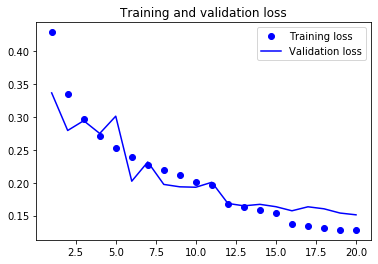

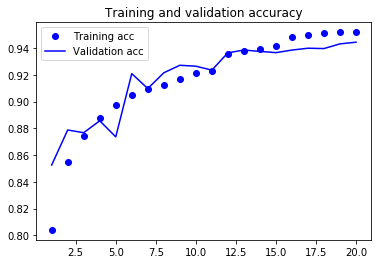

<Figure size 432x288 with 0 Axes>

In [56]:

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

In [57]:
# make a prediction
predictions = model.predict_generator(test_gen, steps=len(df_val), verbose=1)

16000/16000 [==============================] - 44s 3ms/step


In [58]:
predictions.shape

(16000, 2)

In [59]:
# This is how to check what index keras has internally assigned to each class. 
test_gen.class_indices

{'a_no_met_tissue': 0, 'b_has_met_tissue': 1}

In [60]:
# Put the predictions into a dataframe.
# The columns need to be oredered to match the output of the previous cell

df_preds = pd.DataFrame(predictions, columns=['no_met_tissue', 'has_met_tissue'])

df_preds.head()

,no_met_tissue,has_met_tissue
0,0.999984,0.000016
1,0.997075,0.002925
2,0.982009,0.017991
3,0.999901,0.000099
4,0.998343,0.001657


In [0]:
# Get the true labels
y_true = test_gen.classes

# Get the predicted labels as probabilities
y_pred = df_preds['has_met_tissue']

In [62]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_true, y_pred)

0.9854959999999998

In [0]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [0]:
# Get the labels of the test images.

test_labels = test_gen.classes

In [65]:
test_labels.shape

(16000,)

In [0]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [67]:
# Print the label associated with each class
test_gen.class_indices

{'a_no_met_tissue': 0, 'b_has_met_tissue': 1}

Confusion matrix, without normalization
[[7524  476]
 [ 414 7586]]


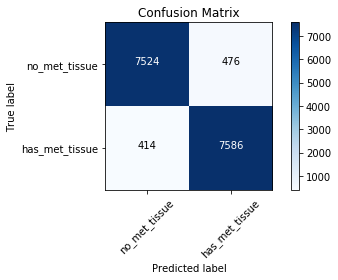

In [68]:
# Define the labels of the class indices. These need to match the 
# order shown above.
cm_plot_labels = ['no_met_tissue', 'has_met_tissue']

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [69]:
from sklearn.metrics import classification_report

# Generate a classification report

# For this to work we need y_pred as binary labels not as probabilities
y_pred_binary = predictions.argmax(axis=1)

report = classification_report(y_true, y_pred_binary, target_names=cm_plot_labels)

print(report)

                precision    recall  f1-score   support

 no_met_tissue       0.95      0.94      0.94      8000
has_met_tissue       0.94      0.95      0.94      8000

      accuracy                           0.94     16000
     macro avg       0.94      0.94      0.94     16000
  weighted avg       0.94      0.94      0.94     16000



In [70]:
!pip install tensorflowjs

     |████████████████████████████████| 61kB 7.7MB/s 
     |████████████████████████████████| 104.6MB 97kB/s 
     |████████████████████████████████| 450kB 50.5MB/s 
     |████████████████████████████████| 3.8MB 48.5MB/s 
     |████████████████████████████████| 256kB 49.8MB/s 
     |████████████████████████████████| 901kB 47.1MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=96141cc4268b323ac274b15e839544f3cf5b936ef82c30f56d854bdcb90b8bc0
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatibl

In [0]:
!tensorflowjs_converter --input_format keras model.h5 tfjs_model_2/model

In [0]:
from keras.models import load_model
model = load_model(<path to your model file on local machine>)

In [77]:
!zip -r model.zip tfjs_model_2

  adding: tfjs_model_2/ (stored 0%)
  adding: tfjs_model_2/model/ (stored 0%)
  adding: tfjs_model_2/model/group1-shard2of2.bin (deflated 7%)
  adding: tfjs_model_2/model/group1-shard1of2.bin (deflated 7%)
  adding: tfjs_model_2/model/model.json (deflated 90%)


In [79]:
files.download('model.zip')

NameError: ignored

In [0]:
from google.colab import files
files.download('model.zip')